# An introduction to Artificial Neural Networks
Maciej Aleksandrowicz, MVG Group 2023, Machine Learning Laboratory, Version 4

## Glossary
| Acronym/Short name | Full name |
| --- | --- |
| ANN | Artificial Neural Network |
| Backprog | Backward propagation |

## Import packages
For today's classes you have to use only numpy! 

No `from framework import solution` is allowed.

In [1]:
# %pip install numpy
import numpy as np

## Part 1: Universal Aproximators
Artifical Neural Networks (ANN) can be seen as a functions aproximators, optimized on provided data. 

### Artificial Neuron Model
* It is slightly modified __McCulloch-Pitts Neuron (1943)__. 
    * instead of Mculloch-Pitts model, you can use any activation function, not just the original  proposition of **step function** with configurable threshold. 
* It would not be a huge mistake to call it colloquially as "**McCulloch-Pitts neuron model**" or just "**neuron model**". 
* Also known as **Sigma Neuron** (due to the sigma symbol for summation).
* It literaty works in 3 steps:
    1) Multiply **inputs** by their coresponding **weights**,
    2) **Add all products with** an offset term called **bias**,
    3) Pass the sum result through a "cramping" function called **activation function**.
        * For instance, __sigmoid(x)__ maps input to range (0,1).

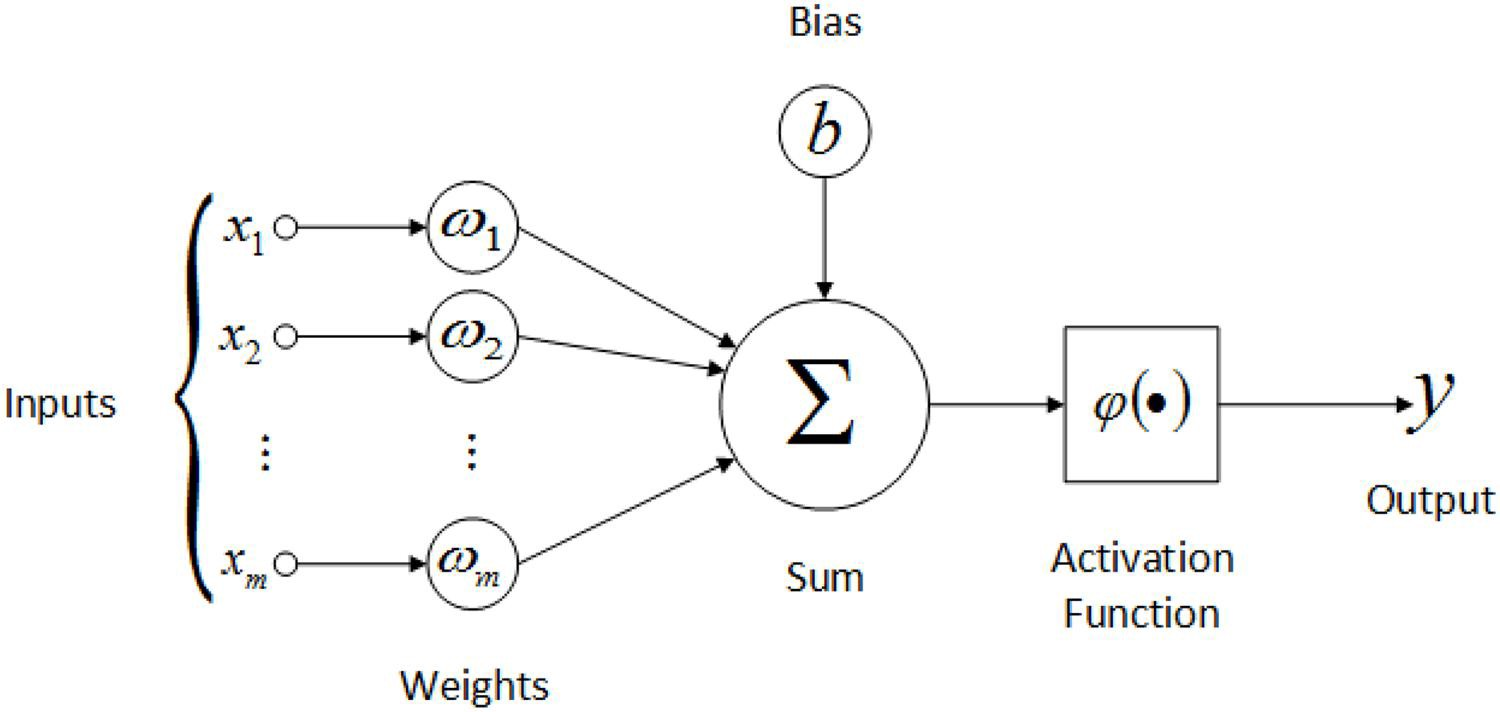

### Matrix representation
Instead of writing equations for multiple neurons, we can arrange multiplication and summation operations into matrices.

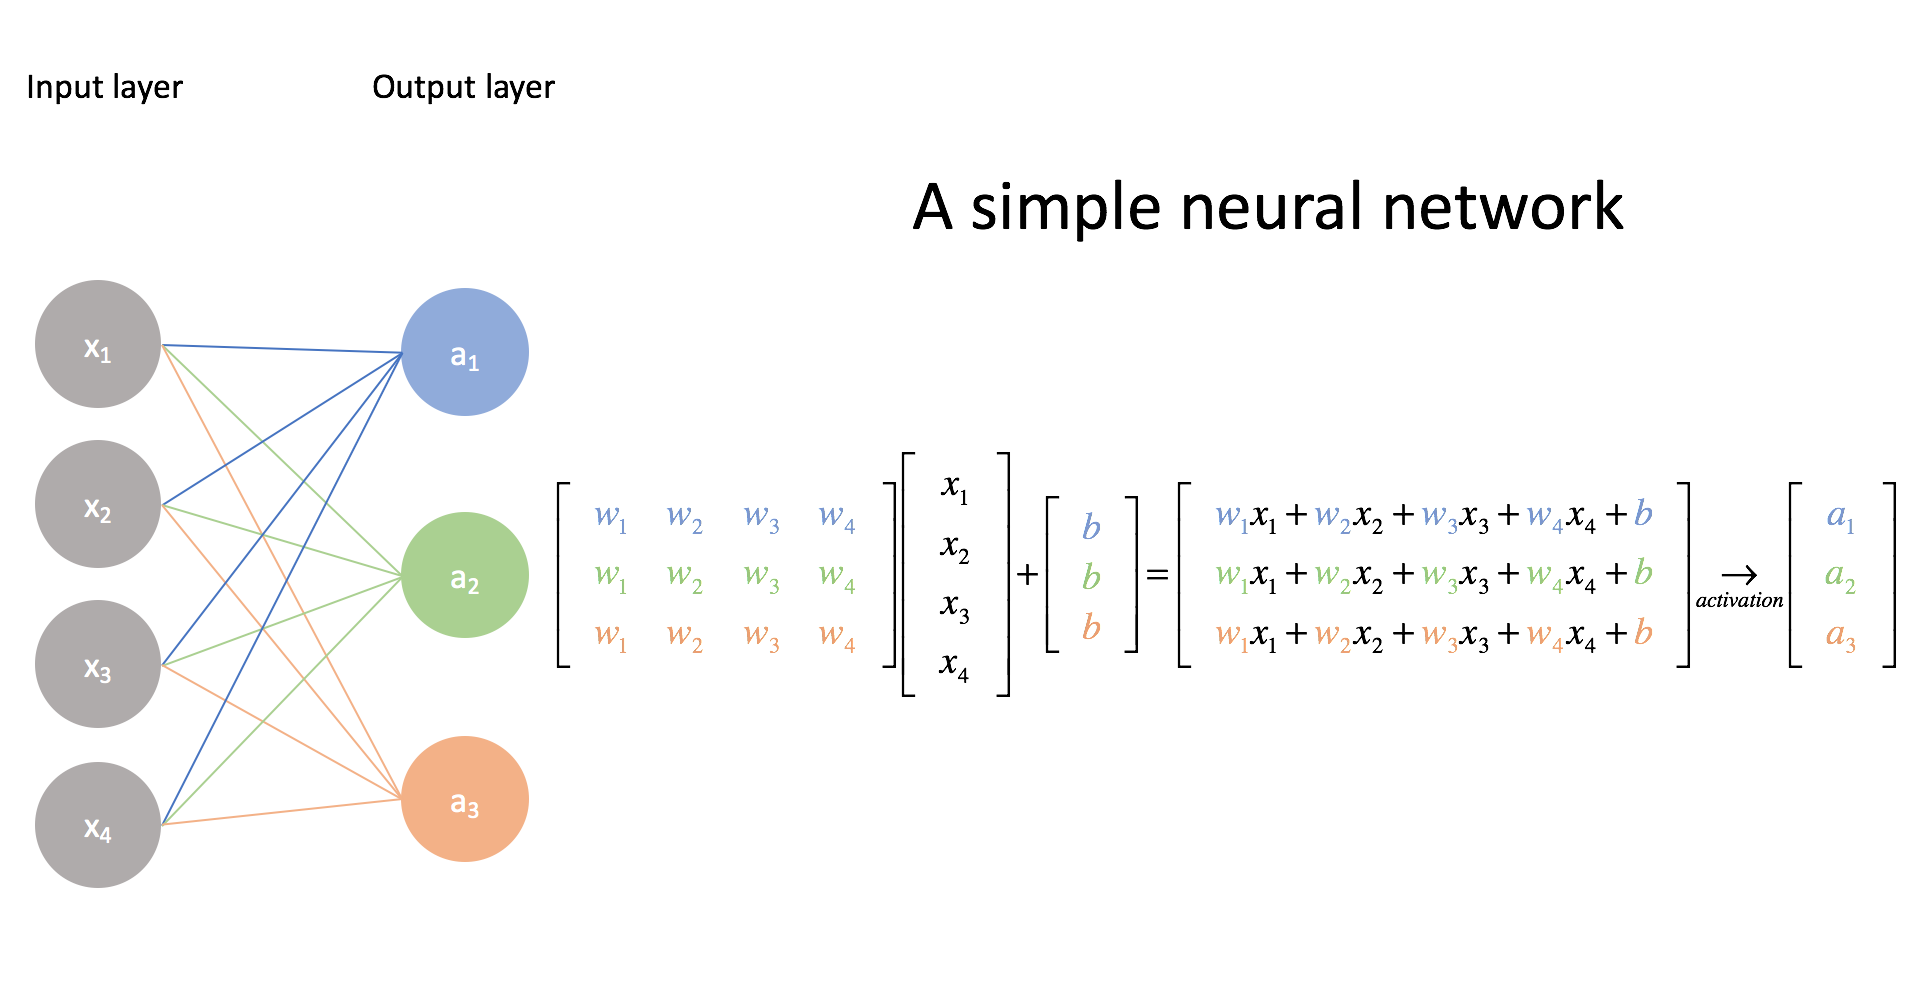

### Example activation functions

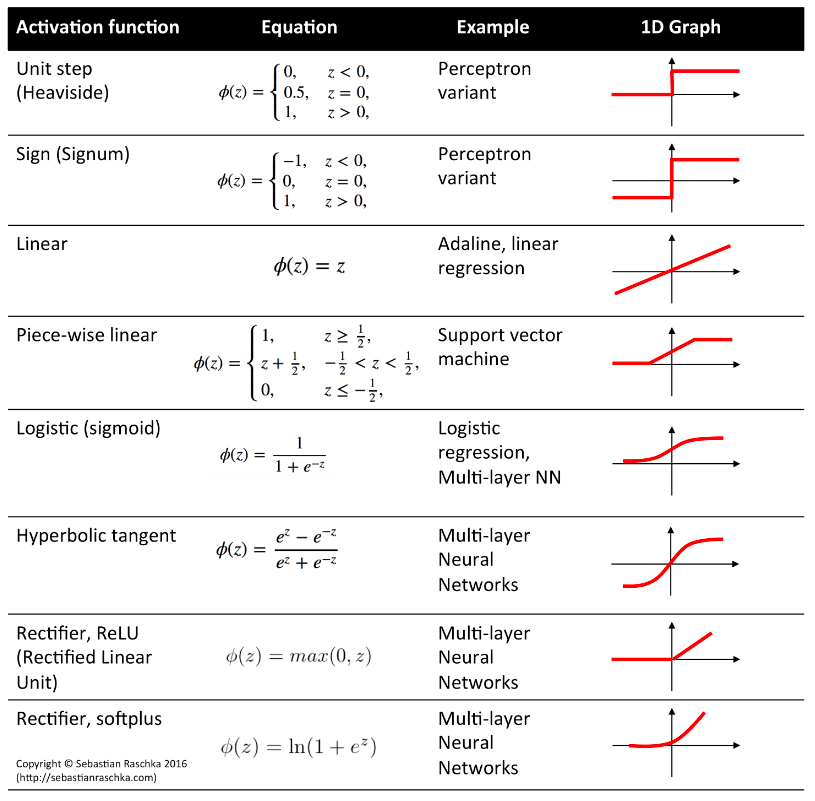

### Example (deep) artifical neural network
Talking about "shallow" or "deep" ANN is tricky - it depends mainly on the context. More than 2-3 layers can be considered as "deep" network.

As you can wonder, the _Deep Learning_ subject is focused on ANNs with multiple layers.

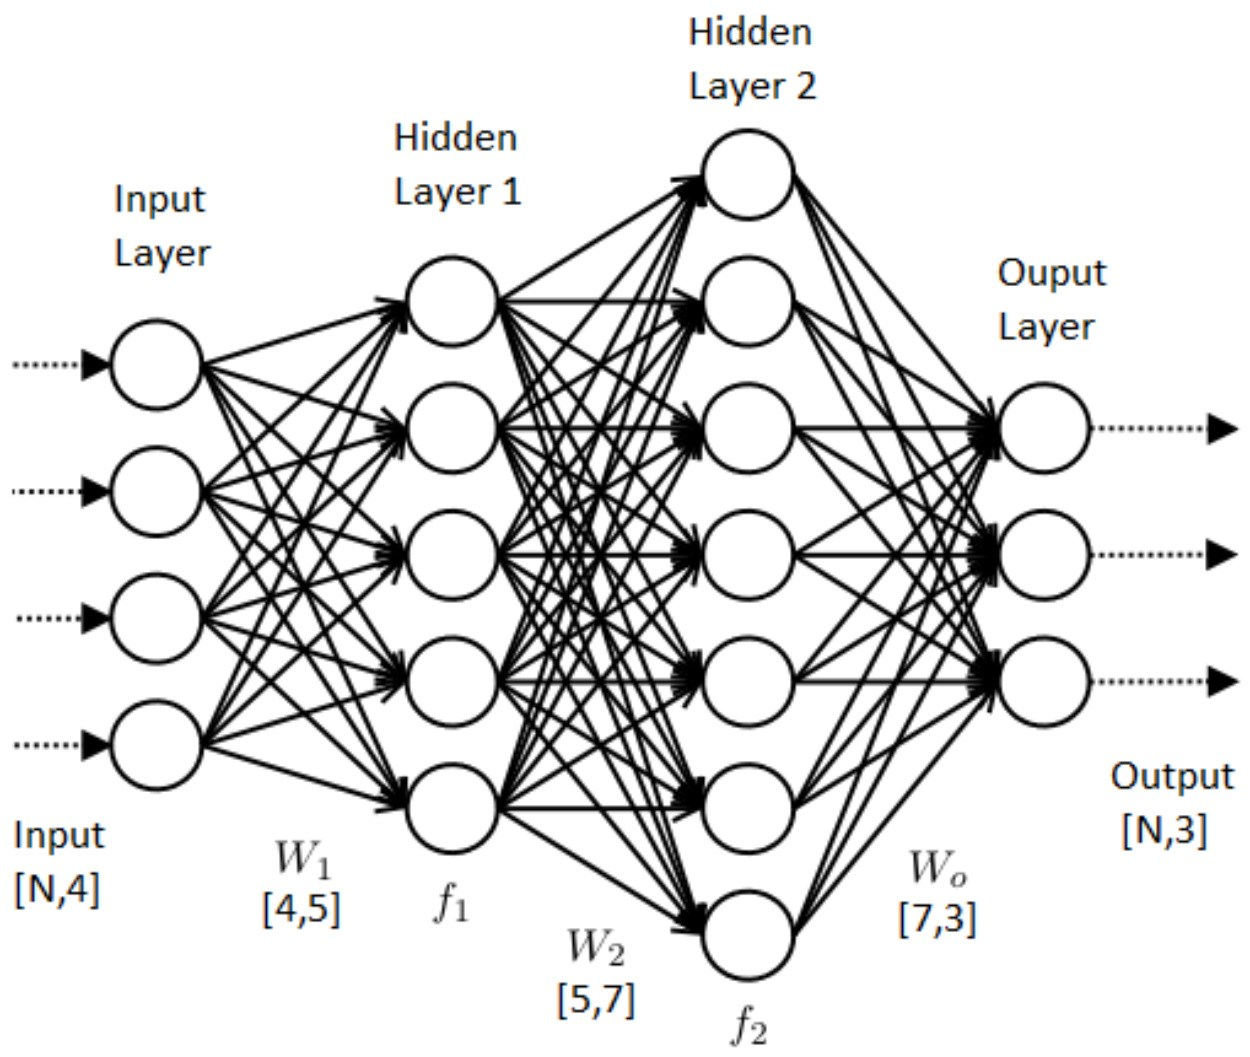

### Forward propagation example

In [2]:
import numpy as np


def ReLU(x: float) -> float:
    return np.maximum(0, x)


# Layer size
input_size = 2
neuron_units = 10

# Initialization
x = np.random.randn(input_size, 1)
weights = np.random.randn(neuron_units, input_size)
biases = np.random.randn(neuron_units, 1)

# Forward propagation
activation = np.dot(weights, x) + biases
y = ReLU(activation)

print(y)

[[0.5735761 ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.69116514]
 [0.        ]
 [0.22590495]
 [1.01508212]
 [0.        ]
 [0.        ]]


### Gradient descent
* **Gradient Descent** is a method of optimizing (training) ANN's weights and biases.
    * There are other methods (ex. The Hebb's Rule) to train ANNs, but they are don't work as good as Gradient Descent
* It consist of 3 main steps:
    * **Forward Propagation** - to calculate output for comparison with desired output (i.e. to form a optimization problem with a Cost function).
    * **Backward Propagation** - to caluclate derivatives of weights & biases (in respect to some Cost function).
    * **Update Paramters** - to (slightly) adjust weights & biases according to calculated derivatives.

#### Single neuron backpropagation 
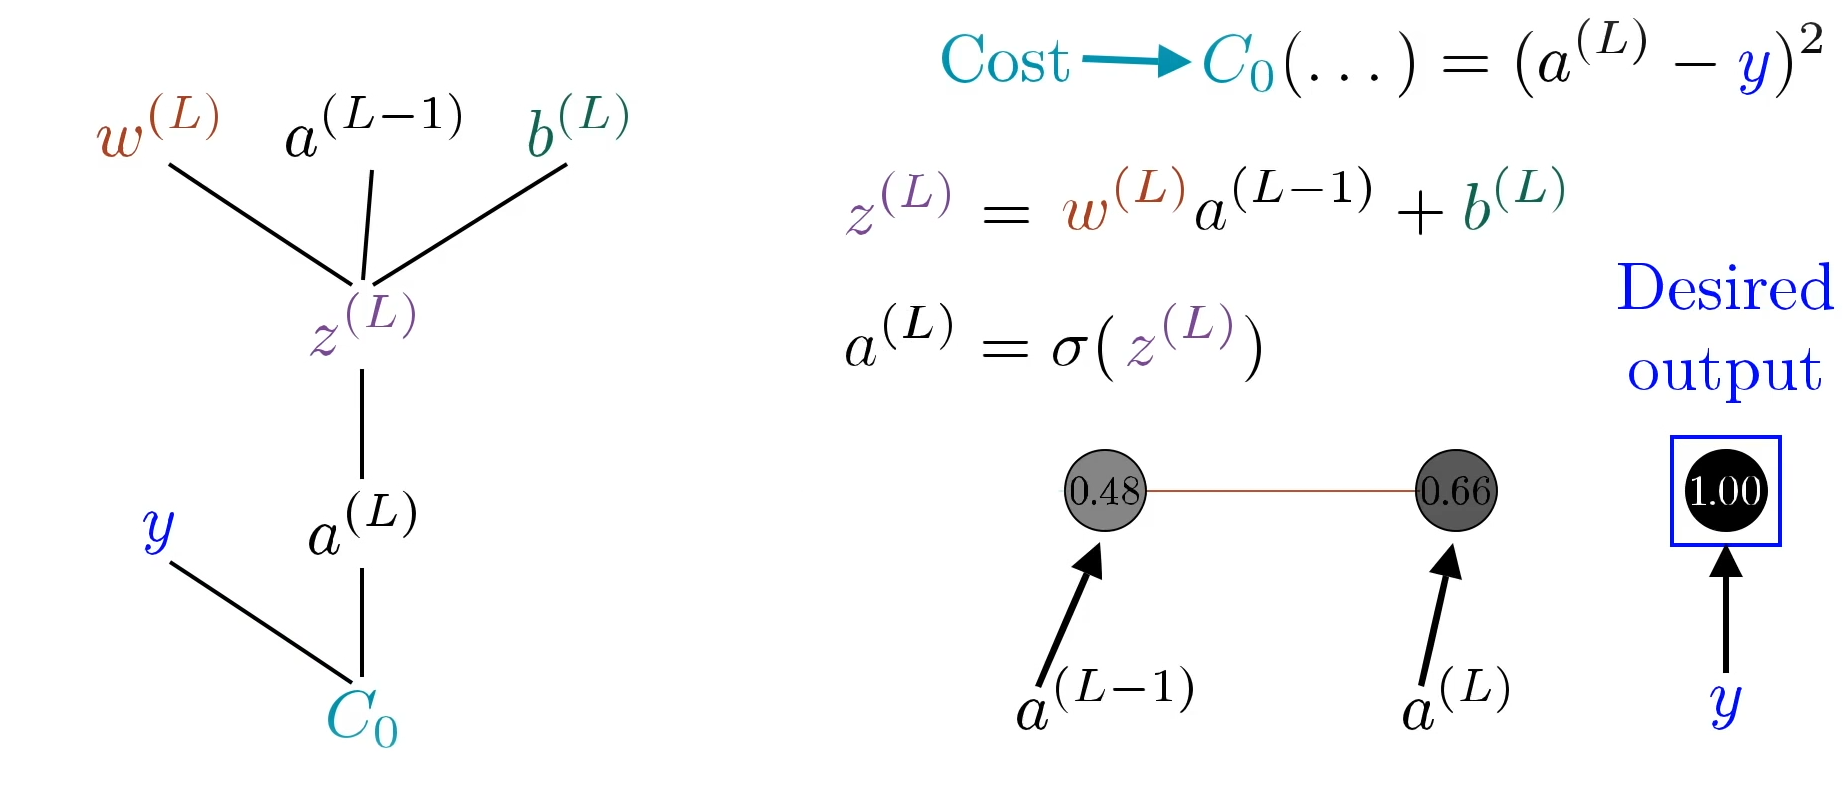

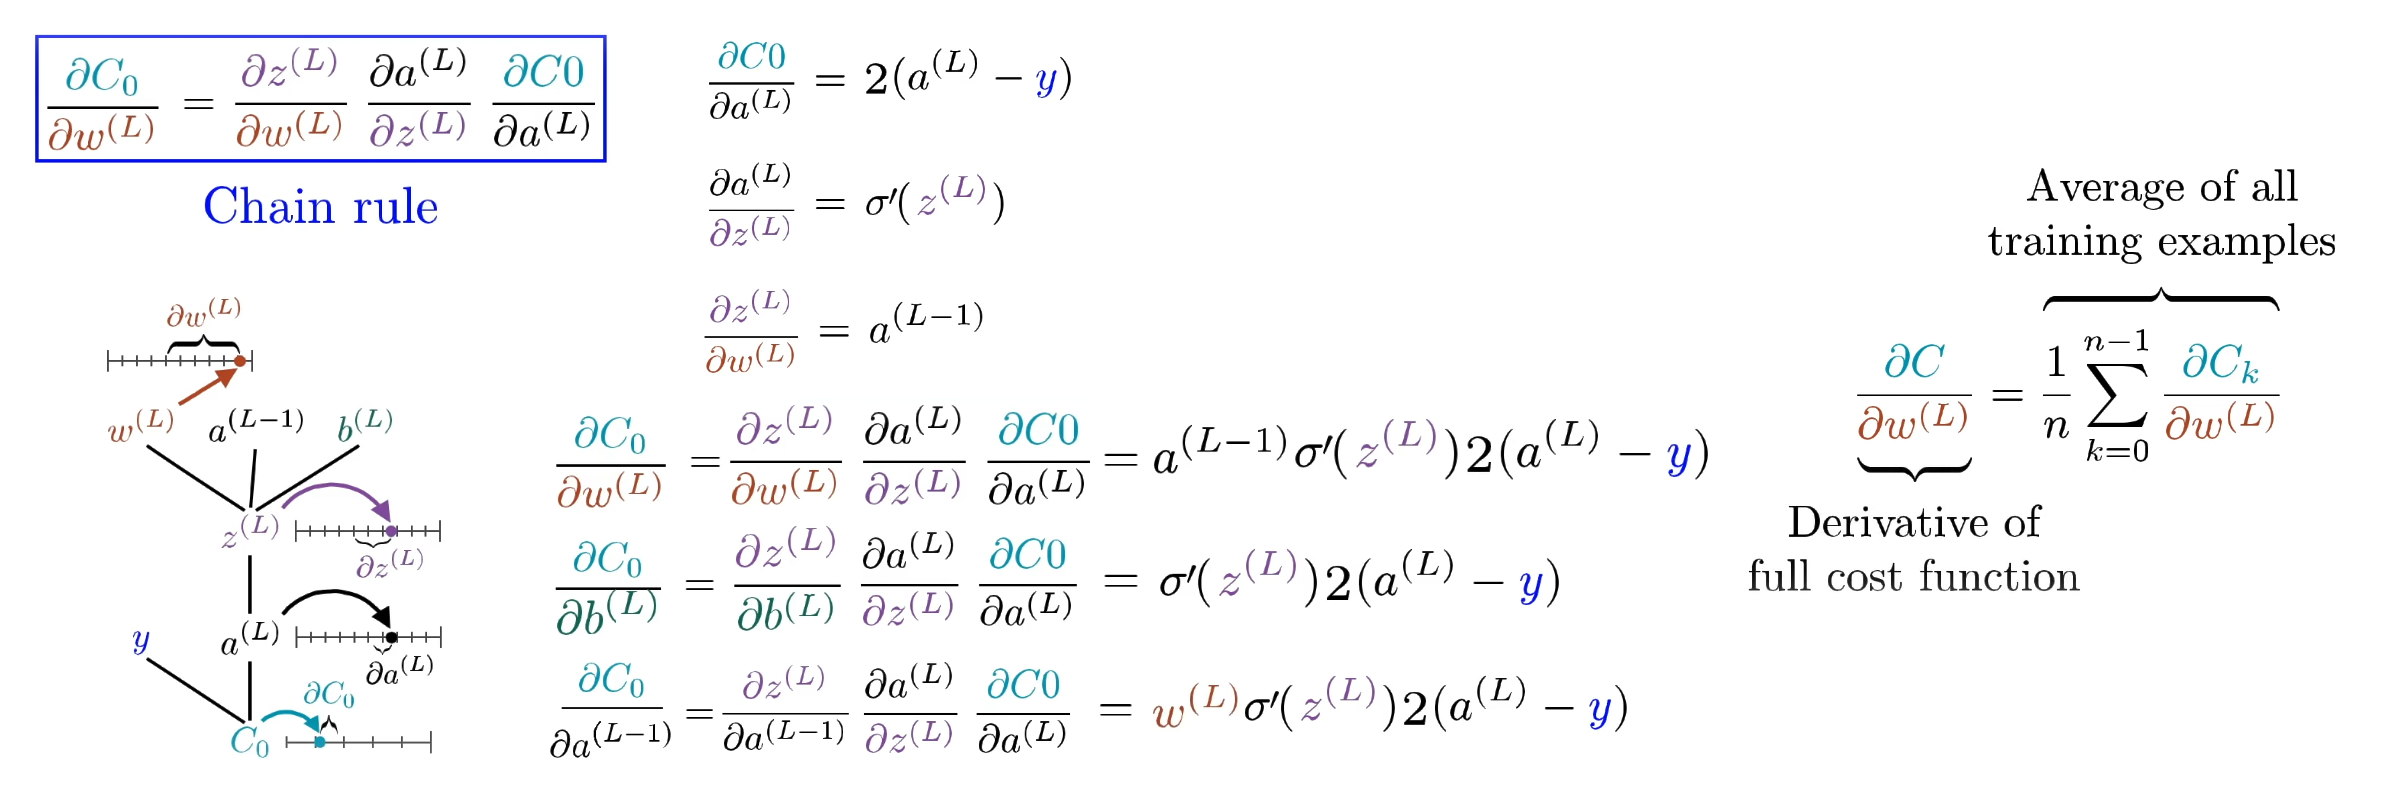

#### Multiple neurons backpropg
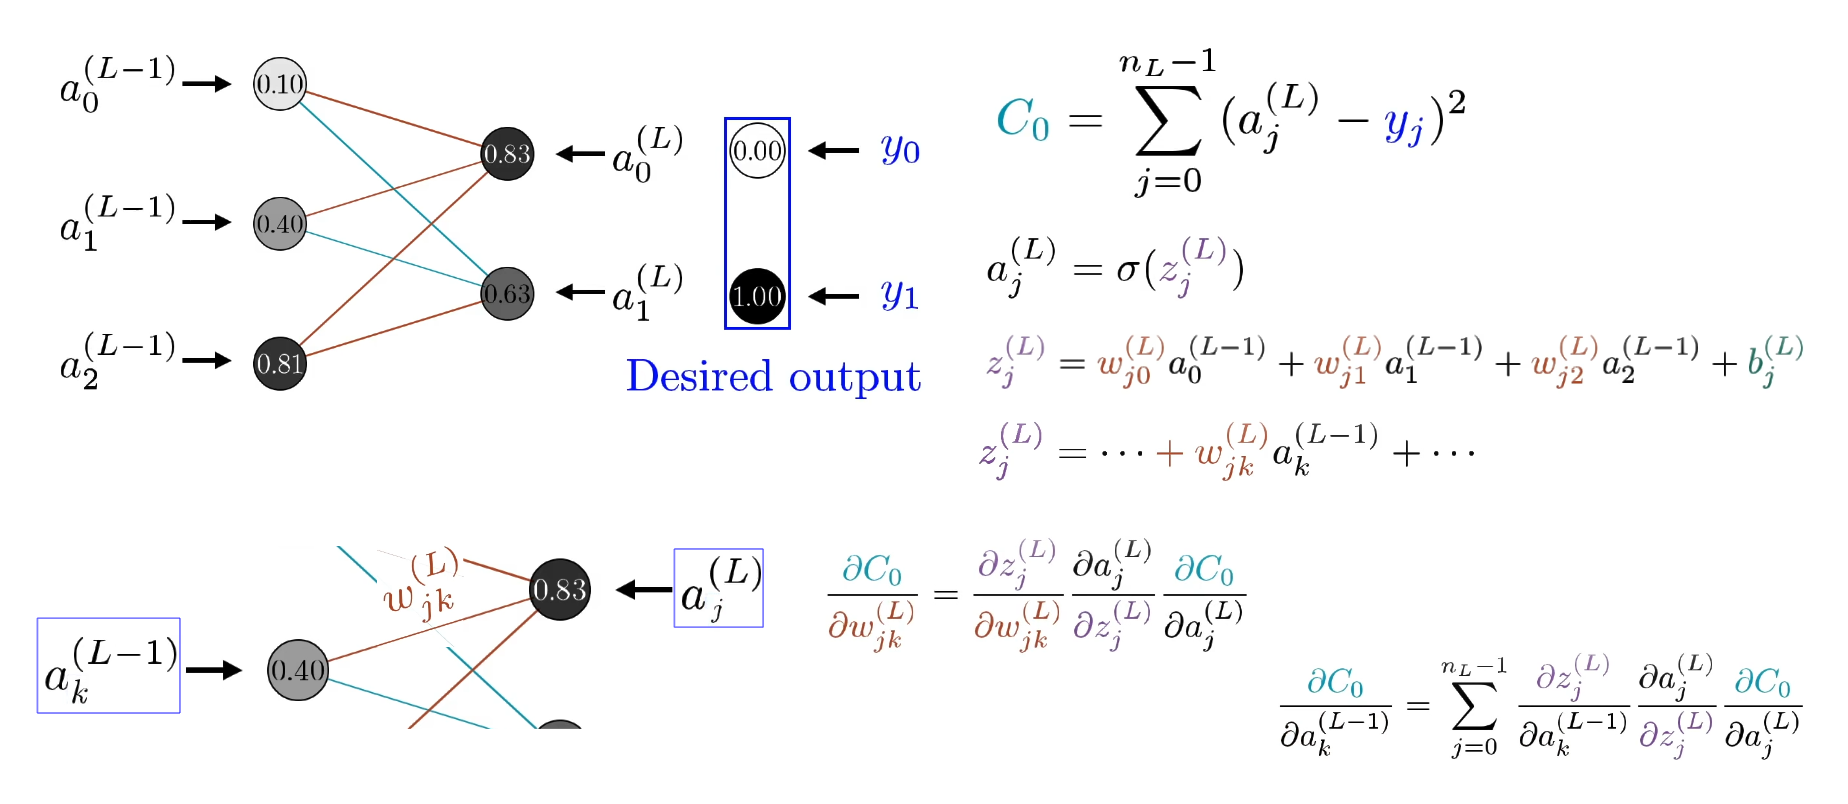

#### Passing gradient to previous layer
* The **Cost function** $C$ is caluclated **only once** for the output of the **whole network**.
    * NOTE: the cost function is also known as **loss function**.
* In general caluclating $$\dfrac{\partial C}{\partial a^{(L-1)}}$$ will result in a vector of derivatives of all activations from previous layer.
* To calculate updates of weights & biases in previous layer $(L-1)$, it is necessary to use each element from the derivative vector $\dfrac{\partial C}{\partial a^{(L-1)}}$ for corersponding activations of neurons $a^{(L-1)}_1, a^{(L-1)}_2, \dots, a^{(L-1)}_m$ where $m$ is the size of $(L-1)$ layer.
* Then, just applay the chain rule further, adding more multiplcation terms (like derivative of the activation function in the current layer).


#### Parameters update
```python
weights = weights - alpha * weights_derivative
bias = bias - alpha * bias_derivative
```
where `alpha` is a **learning rate** parameter which helps us not overshot the local minima during the optimization process of the weights & biases.

We are **substracting** the calculated gradient (i.e. derivative) to descent into minimum.

### Gradient Descent implementation example
With:
* Forawrd Propagation
* Backward Propagation 
* Update Params

and definitions of 2 activation functions.

In [3]:
"""
GOAL: Build a ANN network with 2 layers
* 1 layer:
    * Input size: 10
    * Output size, (aka. Neuron units; aka. layer size): 10
    * Activation function (for all units): ReLU
* 2 layer:
    * Input size: (same as previous layer size, here: 10)
    * Output size: 2
    * Activation function: Softmax
"""
import numpy as np
from typing import Tuple
from collections import namedtuple

# =============================== #

# Let's start with definitions of some activation functions
# ReLU with derivative for the 1st layer


def ReLU(Z):
    return np.maximum(0, Z)


def ReLU_deriv(Z):
    return Z > 0


# And Softmax for the 2nd layer
# taken from https://stackoverflow.com/a/54977170


def softmax(Z):
    e = np.exp(Z)
    return e / np.sum(e, axis=1)


def softmax_deriv(Z):
    # Reshape the 1-d softmax to 2-d so that np.dot will do the matrix multiplication
    Z_reshaped = Z.reshape(-1, 1)
    return np.diagflat(Z_reshaped) - np.dot(Z_reshaped, Z_reshaped.T)


# =============================== #

# Now, we need to somehowe randomly initizalize weights & biases.
# Let's start with some preoparation, and define namedtuples for passing our network parameters
Layer = namedtuple("Layer", ["weights", "bias"])
ANN = namedtuple("ANN", ["layer_1", "layer_2"])


# Then, for simplicty, let's initialize our network in naive way
def init_ann_params(input_size: int, layer_1_size: int, layer_2_size: int) -> ANN:
    # The weights matrix must have dimensions equal to sizes of the input and the number of neural units
    weights_1 = np.random.rand(layer_1_size, input_size) - 0.5
    # The bias vector will have a one parameter (the bias) for each neural unit
    bias_1 = np.random.rand(layer_1_size, 1) - 0.5
    # Let's pack it into our namedtuple
    layer_1 = Layer(weights=weights_1, bias=bias_1)

    # Let's do it analogously with 2nd layer.
    # The input size must mach the size of the previous layer.
    # The output size of this layer will be also the output size of the whole network.
    weights_2 = np.random.rand(layer_2_size, layer_1_size) - 0.5
    bias_2 = np.random.rand(layer_2_size, 1) - 0.5
    layer_2 = Layer(weights=weights_2, bias=bias_2)

    # Finally, return our fresh network, packed in our namedtuple
    return ANN(layer_1, layer_2)


# =============================== #


# It's time for Forward Propagation definition
def forward_prop(
    ann: ANN, input_x: np.array
) -> Tuple[np.array, np.array, np.array, np.array]:
    # Retrive parameters for layer 1
    layer_1 = ann.layer_1
    # Using matrix notation multiply weights matrix by input vector and add bias vector for whole layer 1
    sum_1 = layer_1.weights.dot(input_x) + layer_1.bias
    # Then use the sum vector (each element consist of sum for each neuron in this layer) as input for activation function
    activate_1 = ReLU(sum_1)

    # Moving forward to the 2nd layer - retrive parameters
    layer_2 = ann.layer_2
    # Use the output of the 1st layer as input for the matrix calcucations in 2nd layer
    sum_2 = layer_2.weights.dot(activate_1) + layer_2.bias
    # Use the sum vector with the activation function of the last layer
    activate_2 = softmax(sum_2)

    # Return the sums and the actiavtions results
    # (The sums will be needed to calculate derivatives of te activation functions!)
    return sum_1, activate_1, sum_2, activate_2


# =============================== #
# After the forward propagation it's time for
# The creme de la creme of the implementation - Backward Propagation


# For the input we will need:
#  1) sums and activations from the forward propagation,
#  2) the weights of the all previous layers
#  3) input sample with coresponding output sample (just one pair of samples!)
def backward_prop(
    sum_1: np.array,
    activate_1: np.array,
    sum_2: np.array,
    activate_2: np.array,
    ann: ANN,
    input_x: np.array,
    output_y: np.array,
) -> Tuple[np.array, np.array, np.array, np.array]:
    # First, calculcate the derivative of the cost function
    # (Rememeber - it will always return a scalar value! )
    cost_deriv = 2 * np.sum(activate_2 - output_y)

    # Let's use it to caluclate updates (derivatives) of the weights & biases in the last layer

    # Studing the equations of the backprog, we can observe, that the bias term is slightly easier to implement
    # What is more, *we can reuse it* in calculations of weights and the layer's input derivatives!
    # NOTE: The result is a vector!
    bias_2_deriv = softmax_deriv(sum_2) * cost_deriv

    # In addition, to obtain the derivative of the weights we need just to multiply the bias deriv by the layer's input!
    # NOTE: Using 2 vectors we want to obtain result with dimensions of weights matrix!
    weights_2_deriv = activate_1.dot(bias_2_deriv.transpose())

    # Now, lest propagate the gradient to the first layer by calculating the derivative of the cost function in terms of the input
    layer_2 = ann.layer_2
    activate_1_deriv = layer_2.weights.dot(bias_2_deriv)

    # We can now calculate te derivatives for the 1st layer, reusing the above logic
    bias_1_deriv = ReLU_deriv(sum_1) * activate_1_deriv
    weights_1_deriv = input_x.dot(bias_1_deriv.transpose())
    # NOTE: We don't want to calculate the derivative of the input of the wole network
    # (i.e. we don't want to pass the gradient to the dataset)

    # Return calculcated updates (derivaites) for the weights and biases
    return weights_1_deriv, bias_1_deriv, weights_2_deriv, bias_2_deriv


# =============================== #


# Now lets define function for updating network parameters - weights & biases
# The alpha paramaeters is a learning rate
# Let's update the params in naive way for further simplification
def update_params(
    ann: ANN,
    weights_1_deriv: np.array,
    bias_1_deriv: np.array,
    weights_2_deriv: np.array,
    bias_2_deriv: np.array,
    alpha: float,
) -> ANN:
    layer_1 = ann.layer_1
    layer_1.weights = layer_1.weights - alpha * weights_1_deriv
    layer_1.bias = layer_1.bias - alpha * bias_1_deriv

    layer_2 = ann.layer_2
    layer_2.weights = layer_2.weights - alpha * weights_2_deriv
    layer_2.bias = layer_2.bias - alpha * bias_2_deriv

    # Return the ANN with updated weightes & biases
    return ANN(layer_1, layer_2)


# =============================== #


# Finally, let's define Gradient Descent to call above functions
def gradient_descent(
    input_x: np.array, output_y: np.array, alpha: float, iterations: int
) -> ANN:
    # First, initalize network with random parameters
    ann = init_ann_params()
    for _ in range(iterations):
        # 1) Forward Propragation
        sum_1, activate_1, sum_2, activate_2 = forward_prop(ann, input_x)
        # 2) Backwards Propagation
        weights_1_deriv, bias_1_deriv, weights_2_deriv, bias_2_deriv = backward_prop(
            sum_1, activate_1, sum_2, activate_2, ann, input_x, output_y
        )
        # 3) Update paramaters
        ann = update_params(
            ann, weights_1_deriv, bias_1_deriv, weights_2_deriv, bias_2_deriv, alpha
        )

    # Return the updated network
    return ann

## Part 2: Basic implementation
In the following sections we will depend mainly on Numpy package

In [4]:
import numpy as np

### Task 2.1
Implement an artificial neuron class, with **sigmoid** activation function. Use matrix operations (from Numpy package). Rememebr to define the activation function derivative. You can use following class-template or implement whole class by yourself.

In [5]:
from typing import Callable, Tuple


def activation_function(x: float) -> float:
    return 1 / (1 + np.exp(-x))


def activation_function_deriv(x: float) -> float:
    return activation_function(x) * (1 - activation_function(x))


class Neuron:
    def __init__(self, input_size: int, act_func: Callable, act_func_deriv: Callable, seed=None):
        # Set seed for generator
        np.random.seed(seed)
        self._init_weights_and_bias(input_size)
        self._activation_function = act_func
        self._activation_function_deriv = act_func_deriv

    def _init_weights_and_bias(self, input_size: int):
        self._weights = np.random.rand(input_size, 1)
        self._bias = np.random.random()

    def __call__(self, x: np.array) -> float:
        return self._forward_propagation(x)

    def _forward_propagation(self, x: np.array) -> float:
        return self._activation_function(x.dot(self._weights) + self._bias)
        
    
    def gradient_descent(self, x: np.array, y_target: np.array, alpha: float, iterations: int) -> None:
        for _ in range(iterations):
            weights_derivative, bias_derivative = self._backward_propagation(x, y_target)
            self._update_weights_and_bias(alpha, bias_derivative, weights_derivative)

    
    def _backward_propagation(self, x: np.array, y: np.array) -> Tuple[np.array, np.array]:
        grad_loss = self._forward_propagation(x) - y
        grad_output = self._activation_function_deriv(x.dot(self._weights) + self._bias)
        # print(f"x {x} {x.shape}")
        # print(f"loss {grad_loss} {grad_loss.shape}\nout {grad_output} {grad_output.shape}")
        # print(grad_loss * grad_output * x) # weights update
        # print(grad_loss * grad_output) # bias update
        return (grad_loss * grad_output * x, grad_loss * grad_output)
        
    def _update_weights_and_bias(self, alpha, bias_derivative, weights_derivative):
        for weight in weights_derivative:
            self._weights = self._weights - alpha * weight[:, np.newaxis] 
        for bias in bias_derivative:
            self._bias = self._bias - alpha * bias

    def loss(self, x: np.array, y: np.array) -> float: # loss function is 1/2 (y - z(x))^2
        sqs = 0
        for xx, yy in zip(x, y):
            sq = np.square(yy - self._forward_propagation(xx))
            sqs += sq
        return sqs * .5

    def print(self, additional_message=None):
        if additional_message:
            print(additional_message)
        print(f"Weights:\n{self._weights}\nBias:\n{self._bias}")

## Part 3: Artificial Neuron as binary clasifier
A single neuron used as binary classifier is also known as *perceptron*, frequently used as building block for *dense* layer. It can be used for logistic regression.

### Task 3.1
1) Using your Neuron class construct a following ANN:
  * Input size: 2
  * 1 layer with 1 unit with any activation function
  * Output size: 1

2) Perform separate trainings on provided datasets of truth tables of logic gates. You can experiment with number of iterations (start with n=500) and learnining rate (start with alpha = 0.1)

3) Visualize each dataset and ANN's result (a regression line, as function of two inputs).

4) Comment results

#### OR gate

In [6]:
dataset_or_x = ((0, 0), (0, 1), (1, 0), (1, 1))
dataset_or_y = (0, 1, 1, 1)

dataset_or_x = np.array(dataset_or_x)
dataset_or_y = np.array(dataset_or_y).reshape([4, 1])
# print(f"{dataset_or_x}{dataset_or_x.shape}")
# print(f"{dataset_or_y}{dataset_or_y.shape}")

N_or = Neuron(input_size=2, act_func=activation_function, act_func_deriv=activation_function_deriv, seed=420)

N_or.print("Before learning:")
print("Score:\n", N_or.loss(dataset_or_x, dataset_or_y))
N_or.gradient_descent(dataset_or_x, dataset_or_y, .1, 5000)
N_or.print("\nAfter learning:")
print("Score:\n", N_or.loss(dataset_or_x, dataset_or_y))

N_or(dataset_or_x)

Before learning:
Weights:
[[0.31564591]
 [0.45303068]]
Bias:
0.26698226388996205
Score:
 [0.31248788]

After learning:
Weights:
[[5.37202346]
 [5.37211177]]
Bias:
[-2.43097603]
Score:
 [0.00578361]


array([[0.08084091],
       [0.94984286],
       [0.94983866],
       [0.99975479]])

#### AND gate

In [7]:
dataset_and_x = ((0, 0), (0, 1), (1, 0), (1, 1))
dataset_and_y = (0, 0, 0, 1)

dataset_and_x = np.array(dataset_and_x)
dataset_and_y = np.array(dataset_and_y).reshape([4, 1])
# print(f"{dataset_or_x}{dataset_or_x.shape}")
# print(f"{dataset_or_y}{dataset_or_y.shape}")

N_and = Neuron(input_size=2, act_func=activation_function, act_func_deriv=activation_function_deriv, seed=420)

N_and.print("Before learning:")
print("Score:\n", N_and.loss(dataset_and_x, dataset_and_y))
N_and.gradient_descent(dataset_and_x, dataset_and_y, .1, 5000)
N_and.print("\nAfter learning:")
print("Score:\n", N_and.loss(dataset_and_x, dataset_and_y))

N_and(dataset_and_x)

Before learning:
Weights:
[[0.31564591]
 [0.45303068]]
Bias:
0.26698226388996205
Score:
 [0.62676967]

After learning:
Weights:
[[4.64720751]
 [4.64720763]]
Bias:
[-7.06818001]
Score:
 [0.01140211]


array([[8.51057017e-04],
       [8.15873640e-02],
       [8.15873553e-02],
       [9.02580820e-01]])

#### XOR gate

In [8]:
dataset_xor_x = ((0, 0), (0, 1), (1, 0), (1, 1))
dataset_xor_y = (0, 1, 1, 0)

dataset_xor_x = np.array(dataset_xor_x)
dataset_xor_y = np.array(dataset_xor_y).reshape([4, 1])
# print(f"{dataset_or_x}{dataset_or_x.shape}")
# print(f"{dataset_or_y}{dataset_or_y.shape}")

N_xor = Neuron(input_size=2, act_func=activation_function, act_func_deriv=activation_function_deriv, seed=420)

N_xor.print("Before learning:")
print("Score:\n", N_xor.loss(dataset_xor_x, dataset_xor_y))
N_xor.gradient_descent(dataset_xor_x, dataset_xor_y, .1, 1000)
N_xor.print("\nAfter learning:")
print("Score:\n", N_xor.loss(dataset_xor_x, dataset_xor_y))

N_xor(dataset_xor_x)

Before learning:
Weights:
[[0.31564591]
 [0.45303068]]
Bias:
0.26698226388996205
Score:
 [0.55049939]

After learning:
Weights:
[[0.00285121]
 [0.00310065]]
Bias:
[-0.0035275]
Score:
 [0.50000059]


array([[0.49911813],
       [0.49989329],
       [0.49983093],
       [0.50060609]])

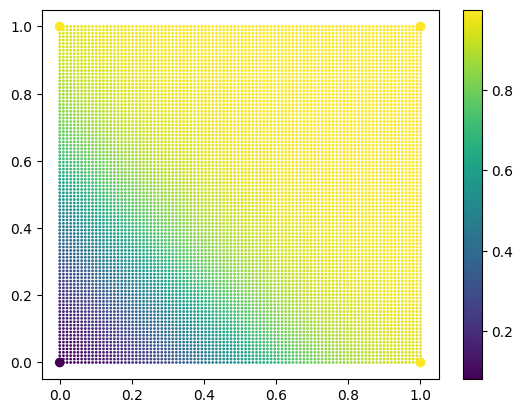

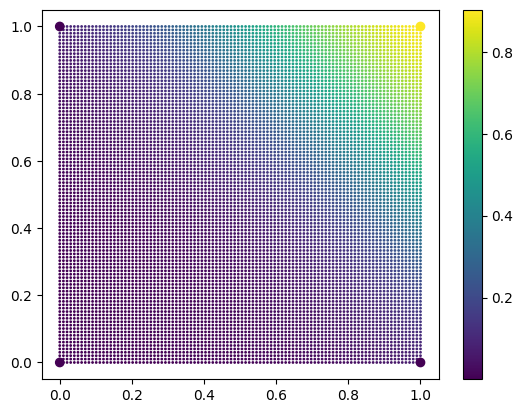

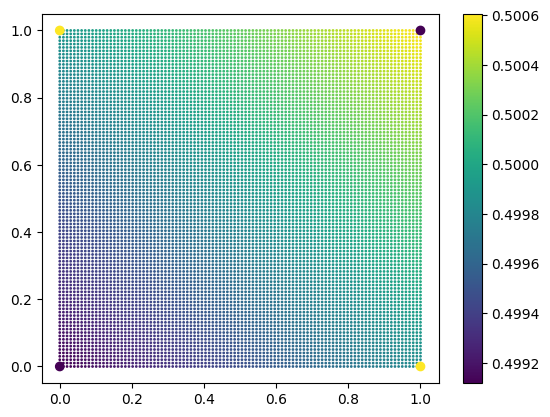

In [9]:
import matplotlib.pyplot as plt
x = dataset_or_x
y = dataset_or_y
N = N_or

X, Y = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
points = np.vstack([X.ravel(), Y.ravel()]).T
plt.colorbar(plt.scatter(points[:,0], points[:,1], c=N(points), s=1))
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

x = dataset_and_x
y = dataset_and_y
N = N_and

X, Y = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
points = np.vstack([X.ravel(), Y.ravel()]).T
plt.colorbar(plt.scatter(points[:,0], points[:,1], c=N(points), s=1))
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

x = dataset_xor_x
y = dataset_xor_y
N = N_xor

X, Y = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
points = np.vstack([X.ravel(), Y.ravel()]).T
plt.colorbar(plt.scatter(points[:,0], points[:,1], c=N(points), s=1))
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

## Part 4: Multilayer perceptron
More neurons can be stacked together to model nonlinear properties.  

### Task 4.1
In this task you have to implement following ANN:
* Input size: 2
* 1 layer with 2 units with sigmoid activation function
* 1 layer with 1 unit with sigmoid activation function
* Output size: 1
    
Your Neuron class was not designed for ambitious merging of weights and biases during the gradient descent, nor for passing outputs to perform forward propagation. To overcome such inconvenience, please manualy define dataflow and method calling for all Neurons. You can expand provided example.

In [10]:
class NeuralNetwork:
    def __init__(self, input_size: int, act_func: Callable, act_func_deriv: Callable, seed=None):
        # TODO
        self._neuron_1 = Neuron(input_size, act_func, act_func_deriv, seed=seed)
        self._neuron_2 = Neuron(input_size, act_func, act_func_deriv, seed=seed)
        self._neuron_3 = Neuron(input_size, act_func, act_func_deriv, seed=seed)

        self._neurons = [self._neuron_1, self._neuron_2, self._neuron_3]
        self._layers = [[self._neuron_1, self._neuron_2], [self._neuron_3]]

    def __call__(self, x: np.array) -> float:
        return self._network_forward_propagation(x)

    def _network_forward_propagation(self, x: np.array) -> float:
        input_3_1 = self._neuron_1(x)
        input_3_2 = self._neuron_2(x)
        # print(f"\n{input_3_1}\n{input_3_2}")
        input_3 = np.hstack([input_3_1, input_3_2])
        return self._neuron_3(input_3)

    def _network_backwards_propagation(self, x: np.array, y: np.array, alpha: float) -> None:
        # forward pass
        input_3_1 = self._neuron_1(x)
        input_3_2 = self._neuron_2(x)
        input_3 = np.hstack([input_3_1, input_3_2])
        output = self._neuron_3(input_3)
        # backprog of neuron 3
        grad_loss = output - y
        grad_output = self._neuron_3._activation_function_deriv( input_3.dot(self._neuron_3._weights) + self._neuron_3._bias )
        # calcualte derivative
        weights_deriv = (grad_loss * grad_output * input_3)
        bias_deriv = (grad_loss * grad_output)
        # update neuron 3
        for weight in weights_deriv:
            self._neuron_3._weights = self._neuron_3._weights - alpha * weight[:,np.newaxis]
        for bias in bias_deriv:
            self._neuron_3._bias = self._neuron_3._bias - alpha * bias
        
        # backprog of neuron 1 and 2
        grad_output1 = self._neuron_1._activation_function_deriv( x.dot(self._neuron_1._weights) + self._neuron_1._bias )
        grad_output2 = self._neuron_2._activation_function_deriv( x.dot(self._neuron_2._weights) + self._neuron_2._bias )
        # calculate derivatives 1 and 2
        weights_deriv1 = (grad_loss * grad_output) * self._neuron_3._weights[0] * grad_output1 * x
        bias_deriv1 = (grad_loss * grad_output) * self._neuron_3._weights[0] * grad_output1
        weights_deriv2 = (grad_loss * grad_output) * self._neuron_3._weights[1] * grad_output2 * x
        bias_deriv2 = (grad_loss * grad_output) * self._neuron_3._weights[1] * grad_output2
        # update neuron 1 and 2
        for weight in weights_deriv1:
            self._neuron_1._weights = self._neuron_1._weights - alpha * weight[:,np.newaxis]
        for bias in bias_deriv1:
            self._neuron_1._bias = self._neuron_1._bias - alpha * bias
        for weight in weights_deriv2:
            self._neuron_2._weights = self._neuron_2._weights - alpha * weight[:,np.newaxis]
        for bias in bias_deriv2:
            self._neuron_2._bias = self._neuron_2._bias - alpha * bias
    
    def gradient_descent(self, x: np.array, y: np.array, alpha: float, iterations: int) -> None:
        for _ in range(iterations):
            self._network_backwards_propagation(x, y, alpha)
        pass

    def print(self, additional_message=None):
        if additional_message:
            print(additional_message)
        for neuron in self._neurons:
            print(f"Weights:\n{neuron._weights}\nBias:\n{neuron._bias}")

### Task 4.2
1) Train your ANN created in task 4.1 on the XOR dataset. You can experiment with number of iterations (start with n=500) and learning rate (start with alpha=0.1).

2) Visualize the dataset and ANN's result (a regression line, as function of two inputs).

3) Comment results.

In [11]:
dataset_xor_x = ((0, 0), (0, 1), (1, 0), (1, 1))
dataset_xor_y = (0, 1, 1, 0)

dataset_xor_x = np.array(dataset_xor_x)
dataset_xor_y = np.array(dataset_xor_y).reshape([4, 1])

NN_xor = NeuralNetwork(input_size=2, act_func=activation_function, act_func_deriv=activation_function_deriv, seed=420)

print(NN_xor(dataset_xor_x))
NN_xor.gradient_descent(dataset_xor_x, dataset_xor_y, .1, 10000)
print(NN_xor(dataset_xor_x))

[[0.66870277]
 [0.68654194]
 [0.68140159]
 [0.69725798]]
[[0.06830527]
 [0.93580456]
 [0.93575834]
 [0.07013618]]


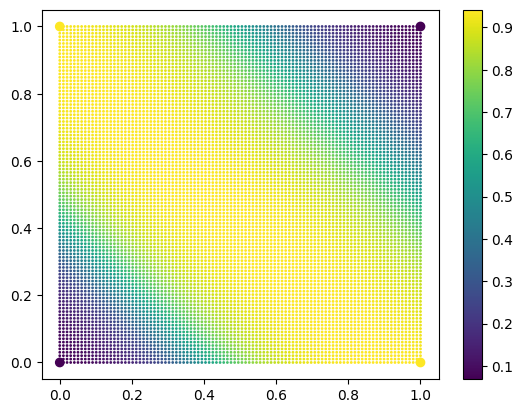

In [12]:
x = dataset_xor_x
y = dataset_xor_y
N = NN_xor

X, Y = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
points = np.vstack([X.ravel(), Y.ravel()]).T
plt.colorbar(plt.scatter(points[:,0], points[:,1], c=N(points), s=1))
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

## Remarks
* **Do not implement ANN by yourself** - use already tested open-source frameworks with hardware acceleration, such as PyTorch, Keras, TensorFlow, Jax+Haiku, etc.
* **Every ANN is just an aproximator for a certain (often unknown) function** - Nothing more, nothing less. The learning procedure is data-based brutal force function derivation.
* **Despite current knowledge, selecting ANN dimensions is still more art than science** - every fixed parameter can be considered as "hyperparameter", which can be further optimized by an adequate algorithm.
* **Selecting an activation function is not trival** - always consider dimishing gradient and caluclation cost

## Further reading
* [YouTube - 3Blue1Brown - Backpropagation calculus](https://www.youtube.com/watch?v=tIeHLnjs5U8)
* [Brilliant - Perceptron](https://brilliant.org/wiki/perceptron/)
* [builtin - How Does Backpropagation in a Neural Network Work?](https://builtin.com/machine-learning/backpropagation-neural-network)
* [edureka! - Backpropagation – Algorithm For Training A Neural Network](https://www.edureka.co/blog/backpropagation/)
* [Visual backpropagation description](https://sebastianraschka.com/faq/docs/visual-backpropagation.html)

## Changelog
### 4.1 [2023-10-04]
* Applied `black` formatting,
* Fixed typo reported by Michał G. in implementation example. Many thanks!
* Started changelog.

# Należy przeprowadzić klasyfikację zbioru Fashion MINST na dwa sposoby:

- Samodzielnie, wykorzystując dotychczasowe doświadczenie (wskazówka: można odrzucić programowanie obiektowe na rzecz “hard-coded” sieci zapisanej na macierzach)
- Wykorzystujac jeden z popularnych frameworków do uczenia głębokiego (PyTorch, Keras, Jax+Haiku). Ogólne podejscie dla Keras można znaleźć tutaj: DNN Lab 1.

# WITH FRAMEWORK (TENSORFLOW)

In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# Scalling input data to 0...1 float 
train_images = train_images / 255.0
test_images = test_images / 255.0
print(train_images.shape, test_images.shape)

# Build the model
model = models.Sequential([
    layers.Input(shape=(28, 28)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10)

ModuleNotFoundError: No module named 'tensorflow'

313/313 - 0s - 991us/step - accuracy: 0.8759 - loss: 0.3489

Test accuracy: 0.8758999705314636 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
9


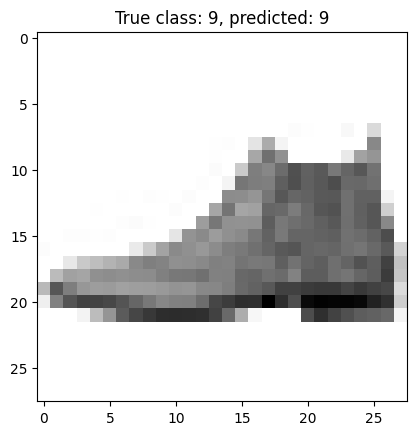

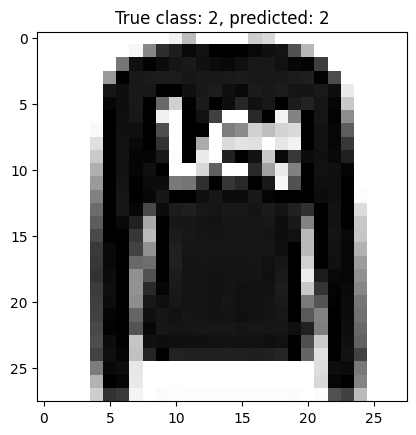

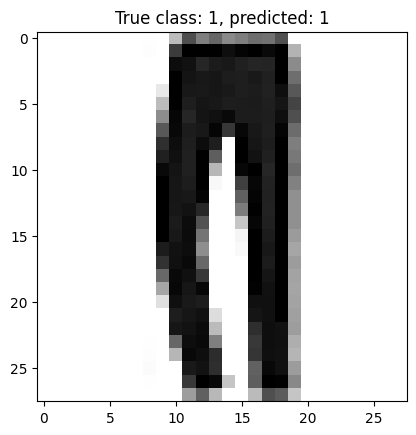

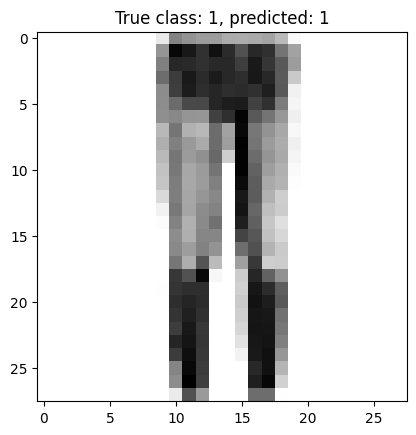

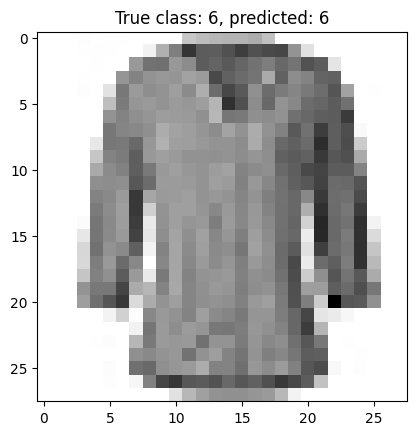

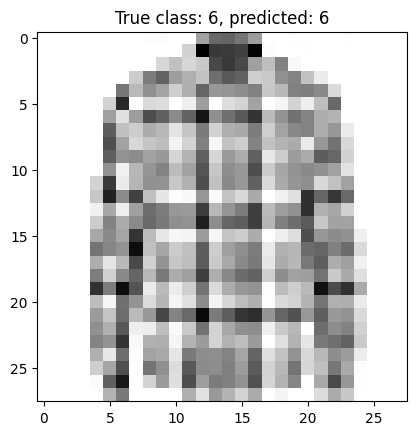

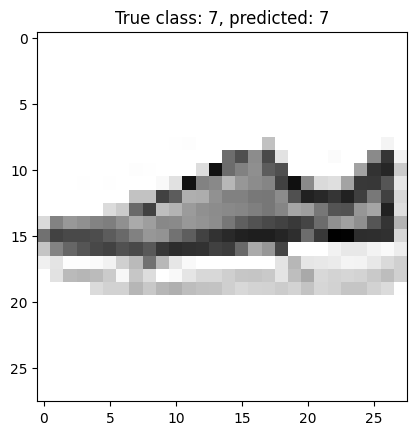

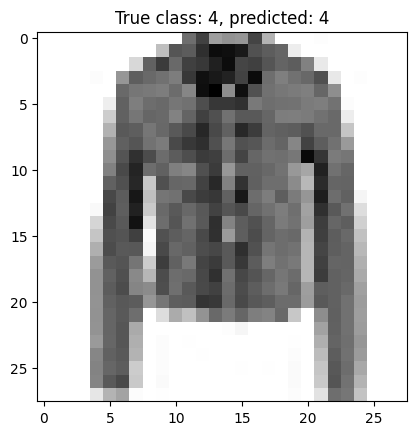

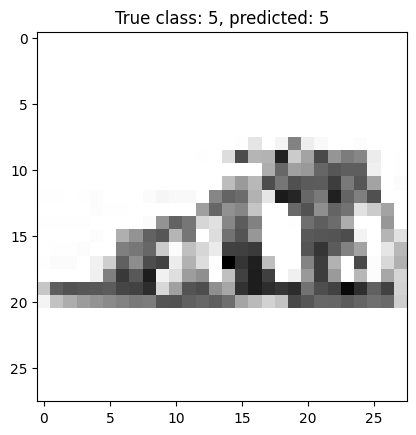

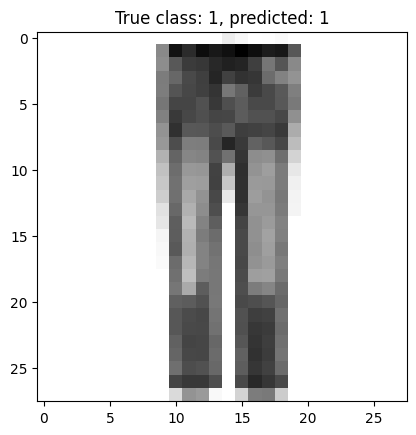

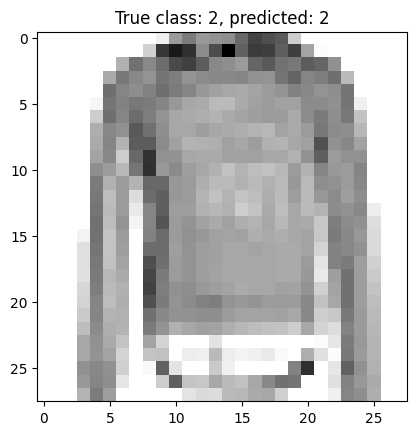

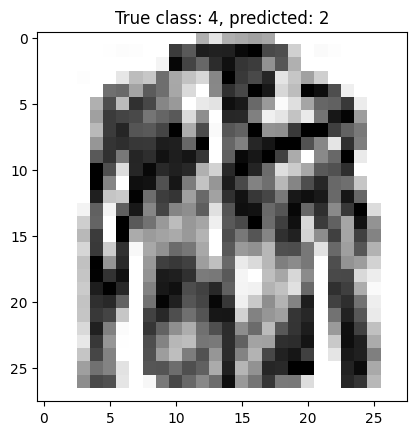

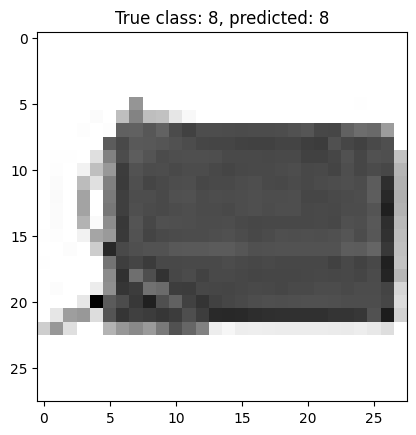

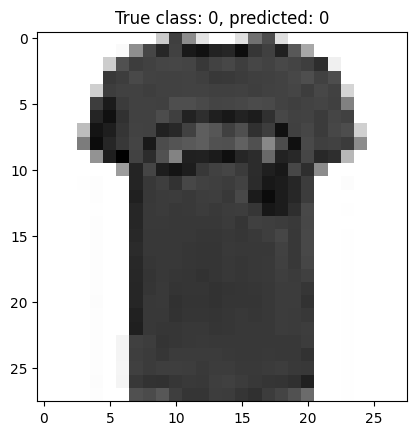

In [ ]:
import matplotlib.pyplot as plt
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc, '\n')

# Make predictions (optional)
predictions = model.predict(test_images)
print(predictions[0].round())
print(test_labels[0])

# Visualize data
for id in range(20): #len(test_labels)
    plt.imshow(test_images[id], cmap='gray_r')
    plt.title(f"True class: {test_labels[id]}, predicted: {np.argmax(predictions[id])}")
    plt.show()

# NUMPY PODEJSCIE DRUGIE

In [ ]:
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(420)
    W1 = np.random.randn(hidden_size, input_size) * 0.01
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(output_size, hidden_size) * 0.01
    b2 = np.zeros((output_size, 1))
    return W1, b1, W2, b2

def relu(Z):
    return np.maximum(0, Z)

def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z))
    return exp_Z / exp_Z.sum(axis=0, keepdims=True)

def forward_pass(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2)
    return A2, cache

def relu_derivative(Z):
    return Z > 0

def backward_pass(X, Y, cache):
    (Z1, A1, W1, b1, Z2, A2, W2, b2) = cache
    m = X.shape[1]

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    return dW1, db1, dW2, db2

def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

def one_hot_encode(Y, num_classes):
    one_hot_Y = np.zeros((num_classes, Y.size))
    one_hot_Y[Y, np.arange(Y.size)] = 1
    return one_hot_Y

def compute_accuracy(predictions, labels):
    return np.mean(predictions == labels)

In [ ]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

# Load data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Flatten the images
train_images = train_images.reshape(train_images.shape[0], -1).T
test_images = test_images.reshape(test_images.shape[0], -1).T

# One-hot encode the labels
train_labels = one_hot_encode(train_labels, 10)
test_labels = one_hot_encode(test_labels, 10)

# Initialize parameters
input_size = 784
hidden_size = 128
output_size = 10
W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)

# Training parameters
learning_rate = 0.01
epochs = 1500

plt_epochs = np.array([])
plt_accuracy = np.array([])
# Training loop
for epoch in range(epochs):
    A2, cache = forward_pass(train_images, W1, b1, W2, b2)
    dW1, db1, dW2, db2 = backward_pass(train_images, train_labels, cache)
    W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
    if epoch == 499:
        learning_rate = .08

    if epoch % 1 == 0:
        predictions = np.argmax(A2, axis=0)
        labels = np.argmax(train_labels, axis=0)
        accuracy = compute_accuracy(predictions, labels)
        print(f"Epoch {epoch + 1}, Accuracy: {accuracy * 100:.2f}%")
        plt_accuracy = np.append(plt_accuracy, accuracy * 100)
        plt_epochs = np.append(plt_epochs, epoch + 1)


Epoch 1, Accuracy: 12.89%
Epoch 2, Accuracy: 13.59%
Epoch 3, Accuracy: 14.29%
Epoch 4, Accuracy: 14.88%
Epoch 5, Accuracy: 15.43%
Epoch 6, Accuracy: 15.91%
Epoch 7, Accuracy: 16.36%
Epoch 8, Accuracy: 16.68%
Epoch 9, Accuracy: 17.02%
Epoch 10, Accuracy: 17.30%
Epoch 11, Accuracy: 17.54%
Epoch 12, Accuracy: 17.75%
Epoch 13, Accuracy: 17.95%
Epoch 14, Accuracy: 18.11%
Epoch 15, Accuracy: 18.25%
Epoch 16, Accuracy: 18.36%
Epoch 17, Accuracy: 18.45%
Epoch 18, Accuracy: 18.54%
Epoch 19, Accuracy: 18.62%
Epoch 20, Accuracy: 18.73%
Epoch 21, Accuracy: 18.80%
Epoch 22, Accuracy: 18.93%
Epoch 23, Accuracy: 19.08%
Epoch 24, Accuracy: 19.26%
Epoch 25, Accuracy: 19.47%
Epoch 26, Accuracy: 19.76%
Epoch 27, Accuracy: 20.04%
Epoch 28, Accuracy: 20.36%
Epoch 29, Accuracy: 20.65%
Epoch 30, Accuracy: 20.87%
Epoch 31, Accuracy: 21.05%
Epoch 32, Accuracy: 21.15%
Epoch 33, Accuracy: 21.25%
Epoch 34, Accuracy: 21.28%
Epoch 35, Accuracy: 21.29%
Epoch 36, Accuracy: 21.34%
Epoch 37, Accuracy: 21.29%
Epoch 38, 

KeyboardInterrupt: 

In [ ]:
title = "500e_a01_1500e_a08"
if False:
    np.savez(title + "_ANN.npz", W1, b1, W2, b2, plt_epochs, plt_accuracy)
try:
    loaded = np.load(title + "_ANN.npz")
    W1 = loaded["arr_1"]
    b1 = loaded["arr_2"]
    W2 = loaded["arr_3"]
    b2 = loaded["arr_4"]
    plt_epochs = loaded["arr_5"]
    plt_accuracy = loaded["arr_6"]
except exception as e:
    print(e)

import matplotlib.pyplot as plt
plt.plot(plt_epochs, plt_accuracy)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

NameError: name 'exception' is not defined

In [ ]:
import matplotlib.pyplot as plt

plt.plot(plt_epochs, plt_accuracy)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.plot(plt_epochs, plt_accuracy)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()